# Introduction to Scikit-Learn(sklearn)
This notebook demonstrates some of the most useful functions of the scikit-learn library .
What we are gonna learn ?
* an end to end scikit learn workflow
* getting the data ready
* choose the right estimator /algorithm for our problems
* fit the algo/model and use it to make predictions on our data
* Evaluating a model
* Save and load a trained model
* Putting it all together

In [1]:
what_were_gonna_do =["0. an end to end scikit learn workflow",
"1. getting the data ready",
"2.choose the right estimator / algorithm for our problems",
"3. fit the algo / model and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together"]

# 0. an end to end scikit learn workflow

In [2]:
# Get the data ready
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
import warnings
warnings.filterwarnings("default")## parameter "default" or "ignore"

In [4]:
import sklearn 
sklearn.show_versions()


System:
    python: 3.12.8 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:48:34) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\SinhaWiz\Desktop\sample_project_2\env\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.5.2
          pip: 24.2
   setuptools: 72.1.0
        numpy: 1.26.4
        scipy: 1.14.1
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.9.2
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 20
         prefix: mkl_rt
       filepath: C:\Users\SinhaWiz\Desktop\sample_project_2\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 28
         prefix: vcomp
       filepath: C:\Users\SinhaWiz\Desktop\sample_project_2\env\vcomp140.dll
        version: None


In [5]:
# Create X(features Matrix)
x = heart_disease.drop("target",axis =1)
# Create X(features labels)
y = heart_disease["target"]


In [6]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
#Fit the model to the data
from sklearn.model_selection import train_test_split

x_train , x_test,y_train , y_test =train_test_split(x,y,test_size = 0.2)#means 80% of data will be used to train and test size 20% data

In [8]:
clf.fit(x_train , y_train);

In [9]:
# make a prediction
y_label = clf.predict(np.array[0,2,3,4])

C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
y_preds = clf.predict(x_test)
y_preds

In [ ]:
y_test

In [ ]:
#Evaluate the model
clf.score(x_train , y_train)

In [ ]:
clf.score(x_test , y_test)

In [ ]:
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score
print(classification_report(y_test , y_preds))

In [ ]:
accuracy_score(y_test , y_preds)

In [ ]:
# improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimaors .......")
    clf = RandomForestClassifier(n_estimators =i).fit(x_train,y_train)
    
    print(f"Model accuracy on test set:{clf.score(x_test , y_test)*100:.2f}%")
    print(" ")

In [ ]:
# Save a model and test it
import pickle
pickle . dump(clf ,open("random_forest_model.pkl","wb"))

In [ ]:
loaded_model = pickle.load(open("random_forest_model.pkl","rb"))
loaded_model.score(x_test,y_test)

In [ ]:
clf.score(x_test,y_test)

In [ ]:
what_were_gonna_do

## 1. Getting the data ready to be used with machine learning model
Three main things we have to do:

1.split the data into features and labels(usually "X" & "Y")

2.Filling (also called imputing) or disregarding missing values

3.Converting non-numerical values to numerical values(also called feature encoding)

In [ ]:
heart_disease.head()


In [ ]:
x=heart_disease.drop("target",axis =1)
x

In [ ]:
y=heart_disease["target"]
y

In [ ]:
# split the data into testing and training sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
x.shape , y.shape

In [10]:
212 + 91

303

In [11]:
len(heart_disease)

303

## 1.1 Make sure it's all numerical

In [12]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [13]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [14]:
#Split in x/y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#Split into training and tests
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [15]:
# Build Machine Learning Model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [16]:
car_sales["Doors"].value_counts() #These are Categorized data

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [17]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make" ,"Colour","Doors"]
one_hot =OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [18]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [19]:
dummies = pd.get_dummies(car_sales[["Make" , "Colour","Doors" ]])
dummies 

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [20]:
#Let's refit our model 
np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(transformed_x , y , test_size =0.2)
model.fit(x_train , y_train)

RandomForestRegressor()

In [21]:
model.score(x_train , y_train)

0.891612713353635

In [22]:
model.score(x_test , y_test)

0.3235867221569877

## 1.2 What if there were missing values
1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether

In [23]:
#Import car sales missing data
car_sales_missing  = pd.read_csv ("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [24]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [25]:
#Create X & Y
x = car_sales_missing.drop("Price",axis = 1)
y= car_sales_missing["Price"]

In [26]:
# # Let's try and convert our data into numbers
# # Turn the categories into numbers
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# categorical_features = ["Make" ,"Colour","Doors"]
# one_hot =OneHotEncoder()
# transformer = ColumnTransformer([("one_hot",
#                                    one_hot,
#                                    categorical_features)],
#                                    remainder="passthrough")
# transformed_x=transformer.fit_transform(x)
# transformed_x

### Fill missing data with Pandas

In [27]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [28]:
#Fill the "Make" column
car_sales_missing.fillna({"Make":"missing"},inplace = True)

#Fill the "Colour" column
car_sales_missing.fillna({"Colour":"missing"},inplace = True)

#Fill the "Doors" column
car_sales_missing.fillna({"Doors":4.0},inplace = True)

#Fill the "Odometer (KM)" column
car_sales_missing.fillna({"Odometer (KM)": car_sales_missing["Odometer (KM)"].mean()},inplace = True)

In [29]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [30]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace = True)

In [31]:
car_sales_missing.isna().sum()
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [32]:
len(car_sales_missing)

950

In [33]:
#Create X & Y
x = car_sales_missing.drop("Price",axis = 1)
y= car_sales_missing["Price"]

In [34]:
# Let's try and convert our data into numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make" ,"Colour","Doors"]
one_hot =OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2. Fill missing values with Scikit - Learn

In [35]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [36]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
# Drop the rows with no labels
car_sales_missing.dropna(subset = ["Price"] , inplace= True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [39]:
# Split into X & Y
x = car_sales_missing.drop("Price" , axis = 1)
y=  car_sales_missing["Price"]

In [40]:
#Fill missing Values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill  categorical values with ' missing ' & numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant",fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant",fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define Columns 
cat_features =["Make" , "Colour"]
door_features=["Doors"]
num_features =["Odometer (KM)"]
#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),
                             ("door_imputer",door_imputer,door_features),
                             ("num_imputer",num_imputer,num_features)])
# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [41]:
car_sales_filled = pd.DataFrame(filled_x , 
                                   columns = ["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [42]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [43]:
# Let's try and convert our data into numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make" ,"Colour","Doors"]
one_hot =OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [44]:
#Now we have got our data as numbers and filled (no missing values)
#Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(transformed_x , y ,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train , y_train)
model.score(x_train , y_train)

0.8845872827949007

In [45]:
model.score(x_test,y_test) 

0.21990196728583944

In [46]:
len(car_sales_filled) , len(car_sales)

(950, 1000)

Choosing the right estimator / algorithm for your problem
Some things to note :
* Sklearn refers to machine learning models,algorithms as estimators
* Classification problem -predicting a category (heart disease or not)
    * Sometimes you'll see 'clf' (short for classifier) used as a classification estimator.
* Regression problem - predicting a number (selling price of a car)

If you are working on a machine learning problem and looking to use SKlearn and not sure what model you should use map:https://scikit-learn.org/stable/machine_learning_map.html

# 2.1 Picking a machine learning problem for a regression problem
### Let's use the California Housing dataset :https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.fetch_california_housing.html

In [47]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [48]:
housing_df = pd.DataFrame(housing["data"],columns =housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [49]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [50]:
#housing_df = housing_df.drop("MedHouseVal",axis =1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [51]:
#Import algorithm / estimator 
from sklearn.linear_model import Ridge
# seeding random seed
np.random.seed(42)
# Create data
x = housing_df.drop("target",axis=1)
y = housing_df["target"]#median house price in $100,000

#split into train and test sets 

x_train , x_test , y_train ,y_test  = train_test_split(x , y ,test_size =0.2)
# Instantiate and fit the model (on the training set)
model = Ridge()
model .fit(x_train , y_train)
#check the score of the model (on the test set)
model.score(x_test , y_test)

0.5758549611440126

What if 'Ridge' didn't work or the score didn't fit our needs?

Well , we could always try a different model ....

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)

Sklearn's ensemble models can be found here : https://scikit-learn.org/stable/modules/ensemble.html

In [52]:
#Import the RandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

#Setup Random seed
np.random.seed(42)

#Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]
#Split the data into train and test

x_train , x_test , y_train ,y_test  = train_test_split(x , y ,test_size =0.2)
#Create random forest model 
model = RandomForestRegressor()
model.fit(x_train,y_train)
#Check the score on the model (on the test set)
model .score(x_test , y_test)

0.8065734772187598

# 2.2 Picking machine learning model for classification

### Research by yourself  about "scikit-learn machine learning models" & algorithms for regression /classification /decision trees  
### Choosing model cheatsheet : https://scikit-learn.org/1.5/machine_learning_map.html

In [53]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
len(heart_disease)

303

Consulting the map and it says ti try LinearSVC

In [55]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC #(SVM stands for "support vector machine")

#Setup random seed
np.random.seed(42)
#Make the data
x= heart_disease . drop("target",axis = 1)
y= heart_disease["target"]
#Split the data

x_train , x_test , y_train ,y_test  = train_test_split(x , y ,test_size =0.2)
#Instantiate LinearSVC
clf = LinearSVC(
)
clf.fit(x_train , y_train)
#Evaluate the LinearSVC
clf.score(x_test , y_test) #shift+Tab (returns the mean accuracy)


0.8688524590163934

In [56]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### Since it is just binary category thats why working like a coin toss and accuracy is also bad

In [57]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 

#Setup random seed
np.random.seed(42)
#Make the data
x= heart_disease . drop("target",axis = 1)
y= heart_disease["target"]
#Split the data

x_train , x_test , y_train ,y_test  = train_test_split(x , y ,test_size =0.2)
#Instantiate LinearSVC
clf = RandomForestClassifier()
clf.fit(x_train , y_train)
#Evaluate the LinearSVC
clf.score(x_test , y_test) #shift+Tab (returns the mean accuracy)


0.8524590163934426

Tidbit : 

        1.If you have structured data ,use ensemble methods
        2.If you have unstructured data , use deep learning or transfer learning

## 3 . Fit the model / algorithm and use it to make predictions on our data .

###  3.1 Fitting the model to the data
Different names for :
* 'x' = features , features variables ,data
* 'y' = labels , targets ,target variables 

In [58]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier 
#Setup random seed
np.random.seed(42)
#Make the data
x= heart_disease . drop("target",axis = 1)
y= heart_disease["target"]
#Split the data

x_train , x_test , y_train ,y_test  = train_test_split(x , y ,test_size =0.2)
#Instantiate LinearSVC
clf = RandomForestClassifier()
# Fit the model to the data (training machine learning model)
clf.fit(x_train , y_train)
#Evaluate the LinearSVC  (use the patterns the model has learnt)
print(f"{clf.score(x_test , y_test)*100:.2f}%") #shift+Tab (returns the mean accuracy)


85.25%


In [59]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [60]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using machine learning models

2 ways to make predictions :
    1.predict()
    2.predict_proba()

In [61]:
# Use a trained model to make predictions
clf.predict(np.array([1,2,3,4,5,6]))  # This doesn't work...

C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [63]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [64]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
#Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
#np.array(y_preds == y_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [66]:
clf.score(x_test,y_test)

0.8524590163934426

In [67]:
from sklearn .metrics import accuracy_score 
accuracy_score(y_test , y_preds)

0.8524590163934426

#### Make predictions with predict_proba()

In [68]:
#predict_proba() returns probability of a classification model
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [69]:
#Let's predict() on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

'predict()' can also be used for regression models

In [70]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [71]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x=housing_df.drop("target",axis =1)
y=housing_df["target"]
#split into training and test sets
x_train , x_test , y_train ,y_test  = train_test_split(x , y ,test_size =0.2)
#Create model instance
model = RandomForestRegressor()
# Fit the model to the data (training machine learning model)
model.fit(x_train , y_train)
# Make predictions
y_preds = model.predict(x_test)

In [72]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [73]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [74]:
len(y_preds) , len(y_test)

(4128, 4128)

In [75]:
#Compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , y_preds)

0.32659871732073664

## 4. Evaluating a machine learning model

Three ways to evaluate Sikit-learn models /estimators :

1. Estimator's built-in 'score()' method 
2. The 'scoring' parameter 
3. Problem-specific metric functions
4. You can read more about these here : https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the 'score' method

In [76]:
from sklearn . ensemble import RandomForestClassifier
np.random.seed(42)
#Create X& Y
x= heart_disease.drop("target",axis =1)
y= heart_disease["target"]
# Create train/test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)
#Create classifier model 
clf = RandomForestClassifier(n_estimators=2)
#Fit classifier to training data
clf.fit(x_train , y_train)


RandomForestClassifier(n_estimators=2)

In [77]:
print(type(type(type(int))))

<class 'type'>


In [78]:
print(type(type))

<class 'type'>


In [79]:
#Highest value for the .score() method is 1.0 , the lowest is 0.0
clf.score(x_train , y_train)

0.9090909090909091

In [80]:
clf.score(x_test,y_test)

0.6885245901639344

Let's use score on our Regression model

In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x=housing_df.drop("target",axis =1)
y=housing_df["target"]

#split into training and test sets
x_train , x_test , y_train ,y_test  = train_test_split(x , y ,test_size =0.2)

#Create model instance
model = RandomForestRegressor(n_estimators = 90)

# Fit the model to the data (training machine learning model)
model.fit(x_train , y_train)


RandomForestRegressor(n_estimators=90)

In [82]:
model.score(x_test , y_test)

0.8063648456812202

In [83]:
#The default score() evaluation metric is r_squared for regression
model.score(x_test , y_test)

0.8063648456812202

In [84]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 4.2 Evaluating a model using the 'scoring' parameter

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn . ensemble import RandomForestClassifier
np.random.seed(42)
#Create X& Y
x= heart_disease.drop("target",axis =1)
y= heart_disease["target"]
# Create train/test
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)
#Create classifier model 
clf = RandomForestClassifier(n_estimators=100)
#Fit classifier to training data
clf.fit(x_train , y_train)


RandomForestClassifier()

In [86]:
clf.score(x_test,y_test)

0.8524590163934426

In [87]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [88]:
np.random.seed(42)
# Single training and test split
clf_single_score = clf.score(x_test, y_test)
#Take the mean of 5-fold cross validation score 
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))## Convert np.float64 to Python float :  mean_score = float(mean_score)  print(mean_score)
#compare the two
clf_single_score , clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [89]:
#Deafault scoring parameter of classifier = mean accuracy
clf.score(x,y)

0.9702970297029703

In [90]:
# Scoring parameter set to None by default
cross_val_score(clf , x ,y,cv=5,scoring=None) # shift+Tab

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
 1. Accuracy
 2. Area under ROC curve
 3. Confusion matrix
 4. Classification report

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn . ensemble import RandomForestClassifier
np.random.seed(42)
x= heart_disease.drop("target",axis =1)
y= heart_disease["target"]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)
cross_val_scores = cross_val_score(clf,x,y,cv=5)

In [92]:
float(np.mean(cross_val_scores))

0.8215300546448088

In [93]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {float(np.mean(cross_val_scores))*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.15%


**Area under the reciever operating characteristic curse (AUC/ROC)**
 * Area under curve (AUC)
 * ROC curve
   
ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True Positive = model predict's 1 when truth is 1
* False positive = model predict's 1 when truth is 0
* True negative = model predict's 0 when truth is 0 
* Flase negative = model predict's 0 when truth is 1

In [94]:
#Create xtest ....etc
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [95]:
from sklearn.metrics import roc_curve 
#Fit the classifier
clf.fit(x_train , y_train)
#Make predictions with probabilities

y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.89, 0.11],
       [0.05, 0.95],
       [0.1 , 0.9 ],
       [0.79, 0.21],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.76, 0.24],
       [0.19, 0.81],
       [0.62, 0.38],
       [0.99, 0.01]])

In [96]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01, 0.21,
       0.25, 0.46, 0.55, 0.32, 0.76, 0.69, 0.98, 0.78, 0.52, 0.01, 0.68,
       0.91, 0.05, 0.67, 0.67, 0.  , 0.03, 0.12, 0.94, 0.24, 0.63, 0.99,
       0.86, 0.1 , 0.  , 0.89, 0.  , 0.98, 0.4 , 0.73, 0.44, 0.83, 0.49,
       0.71, 0.  , 0.09, 0.07, 0.48, 0.89, 0.05, 0.84, 0.73, 1.  , 0.47,
       0.71, 0.96, 0.47, 0.32, 0.92, 0.6 ])

In [97]:
# Calculate fpr , tpr ,thresholds 
fpr , tpr ,thresholds = roc_curve(y_test , y_probs_positive)
#Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

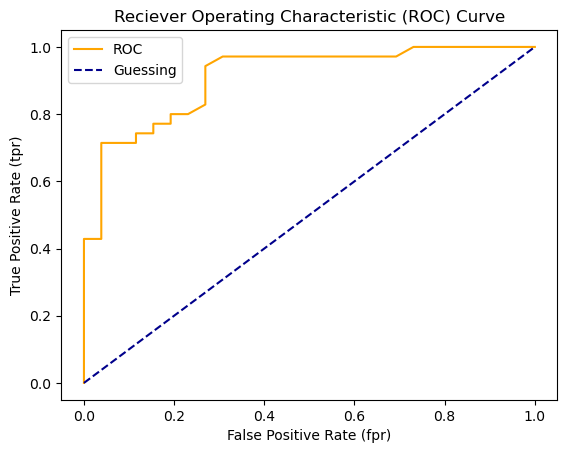

In [98]:
#Create a function for plotting ROC curves
%matplotlib inline
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate(tpr) of a model
    """
    #Plot roc curve 
    plt.plot(fpr,tpr,color ='orange',label="ROC")
    #Plot line with no predictions power (baseline)
    plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='Guessing')
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test ,y_probs_positive)

0.9093406593406593

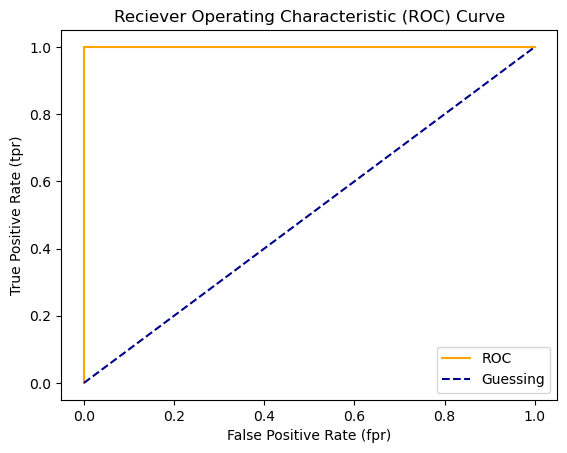

In [100]:
#Plot perfect ROC curve and AUC score 
fpr, tpr , tresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [101]:
#Perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict .

In essence , giving yo an idea of where the model is getting  confused.

In [102]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test , y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [103]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test , y_preds ,
            rownames =["Actual Labels"],
            colnames =["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,21,5
1,8,27


In [104]:
24 + 6 +3 +28

61

In [105]:
len(x_test)

61

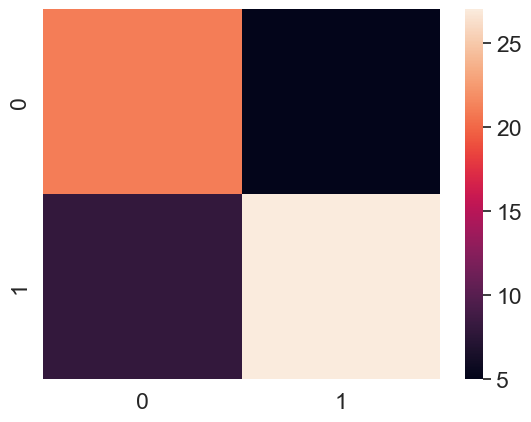

In [106]:

#Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test , y_preds)
#Plot it using Seaborn
sns.heatmap(conf_mat)
plt.show()


### Creating a  confusion matrix using scikit-learn

To use the new methods of creating matrix with scikit-learn you will need sklearn ver 1.0+

In [107]:
import sklearn
sklearn.__version__

'1.5.2'

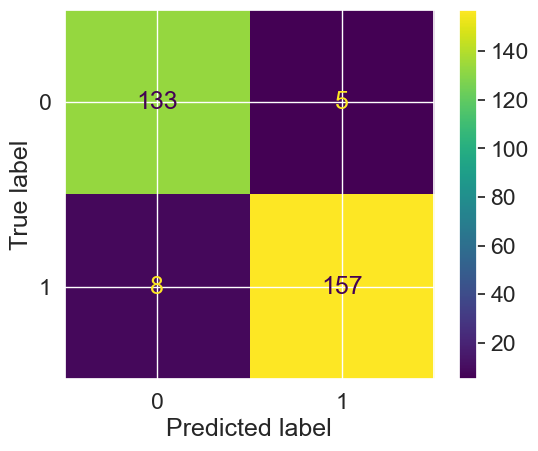

In [108]:
plt.close('all')
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)
plt.show();

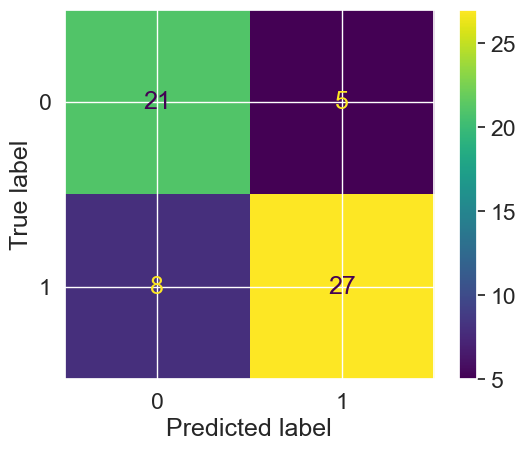

In [109]:
plt.close('all')
ConfusionMatrixDisplay.from_predictions(y_true =y_test,
                                        y_pred=y_preds)
plt.show()

**Classification Report**

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [111]:
#where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0]=1 #only 1 positive case
disease_preds = np.zeros(10000)#model predicts every case as 0
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


**model evaluation scikit learn**:https://scikit-learn.org/0.16/modules/model_evaluation.html

### 4.2.2 Regression Model Evaluation Matrix
model evaluation documentation : https://scikit-learn.org/0.16/modules/model_evaluation.html#regression-metrics

The one we're going to cover are:

    1. R^2 (pronunced r-squared) or coefficient of determination
    2. Mean absolute error (MAE)
    3. Mean squared error (MSE)
**R^2**
What R-squared does: Compares your models predictions to the mean of the targets . Value can range from negative infinity (a very poor model) to 1. For example , if all your model does is predict the mean of the targets  , it's **R^2** value would be 0 . And if your model perfectly predicts a range of numbers it's **R^2** value would be 1.

In [112]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x= housing_df.drop("target" , axis =1)
y= housing_df["target"]
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size = 0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train , y_train)

RandomForestRegressor()

In [113]:
model.score(x_test,y_test)

0.8065734772187598

In [114]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [115]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [116]:
y_test.mean()

2.0550030959302323

In [117]:
from sklearn.metrics import r2_score 
# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [118]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [119]:
r2_score(y_true = y_test,
         y_pred=y_test_mean)

0.0

In [120]:
r2_score(y_true = y_test,y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values .

It gives you an idea of how wrong your models predictions are.

In [121]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test , y_preds)
mae

0.32659871732073664

In [122]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [123]:
df = pd.DataFrame(data = {"actual values" : y_test ,
                          "predicted values" : y_preds})
df["differences"] =df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [124]:
dfs = df["differences"].abs()

In [125]:
dfs.mean()

0.32659871732073664

In [126]:
#or  MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

**Mean Squared Error (MSE)**

In [127]:
#Mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [128]:
df["squared_differences"]= np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [129]:
# Calculate MSE by hand 
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [130]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

C:\Users\SinhaWiz\AppData\Local\Temp\ipykernel_11732\3409892222.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [131]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [132]:

df_large_error["squared_differences"].mean()

0.2573437523766412

In [133]:
#Calculate MSE with large error
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [134]:
df_large_error["squared_differences"].mean()

0.7334180712088106

**RMSE** laern from scikit-learn documentation

### 4.2.3 Finally Using Scoring Parameter 
https://scikit-learn.org/1.5/modules/model_evaluation.html

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x= heart_disease.drop("target" , axis =1)
y= heart_disease["target"]
clf = RandomForestClassifier(n_estimators=100)

In [136]:
np.random.seed(42)
# Cross-validation accuracy (CVA)
cv_acc = cross_val_score(clf,x,y,cv = 5 , scoring = None)# if scoring is NONE then estimators default scoring  evaluation metricis use which is accuracy for classification model
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [137]:
# Cross validated accuracy (a model with no false negative has a precision - 1.0)
print(f"The cross- validated accuracy is {np.mean(cv_acc)*100:.2f}%")

The cross- validated accuracy is 82.48%


In [138]:
#Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,x,y ,cv=5 , scoring ="precision" )
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [139]:
print(f"The cross- validated precisionis {np.mean(cv_precision)*100:.2f}%")

The cross- validated precisionis 83.30%


In [140]:
#Recall  (a model with no false positives has a recall - 1.0)
np.random.seed(42)
cv_recall = cross_val_score(clf , x , y , cv = 5 , scoring ="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [141]:
#Cross-validated recall
print(f"The cross-validated recall is : {np.mean(cv_recall)*100:.2f}%")

The cross-validated recall is : 85.45%


Let's see the `scoring` parameter for regression problem ...

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x= housing_df.drop("target" , axis =1 )
y = housing_df["target"]
model = RandomForestRegressor(n_estimators=100)

In [143]:
np.random.seed(42)
cv_r2= cross_val_score(model , x, y , cv =3 , scoring =None)
np.mean(cv_r2)

0.6545458023124507

In [144]:
#Mean squared error 
cv_mse = cross_val_score(model , x, y, cv =3 , scoring = "neg_mean_squared_error")
np.mean(cv_mse)

-0.4626304189468596

In [145]:
cv_mse

array([-0.51816064, -0.33163551, -0.53809511])

In [146]:
# Mean absolute error
cv_mae = cross_val_score(model , x, y, cv =3 , scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [147]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

## 4.3 Using different evaluation metrics as Scikit-Learn functions
The 3rd way to rvaluatescikit-learn machine learning models/estimators is to using the `sklearn.metrics`
https://scikit-learn.org/1.5/api/sklearn.metrics.html

In [148]:
from sklearn.metrics import accuracy_score , precision_score , recall_score ,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

x = heart_disease.drop("target" , axis =1)
y = heart_disease["target"]
#Split
x_train , x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train , y_train)
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test , clf.predict(x_test))*100:.2f}%")
## or use another variable
y_preds = clf.predict(x_test)
print(f"Precision:{precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall:   {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1:       {f1_score(y_test, y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
Precision:84.85%
Recall:   87.50%
F1:       86.15%


In [149]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
x = housing_df.drop("target" , axis =1)
y = housing_df["target"]
x_train , x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
print("Regression metrics on the test set")
print(f"R2  :   {r2_score(y_test , y_preds)*100:.2f}%")
print(f"MAE :   {mean_absolute_error(y_test, y_preds)*100:.2f}%")
print(f"MSE :   {mean_squared_error(y_test, y_preds)*100:.2f}%")
##print(f"F1:       {f1_score(y_test, y_preds)*100:.2f}%")

Regression metrics on the test set


C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


ValueError: Found input variables with inconsistent numbers of samples: [4128, 61]

## 5. Improve a model
First predicitons  = baseline predictions .
First Model = baseline model.
    
From a data prespective :
* Could we collect more data?(generally ,the more data , the better)
* Could we improve the data?(get more information from existing data)

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model? (changing hyper_parameters)

HyperParameters Vs Parameters
* Parameters = model find these patterns in data
* HyperParameters = setting on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust the hyperparameters
1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [150]:
from sklearn .ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyper parameters by Hand
Let's make 3 sets , training , validation , test

In [151]:
clf.get_params() ## these are baseline parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're gonna try and adjust :
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [152]:
def evaluate_preds(y_true , y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true , y_preds)
    precision = precision_score(y_true , y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true , y_preds)
    metric_dict = {"accuracy" : round(accuracy,2),
                    "precision": round(precision,2),
                    "recall" : round(recall,2),
                    "f1" : round(f1,2)
                   }
    print(f"Accuracy :{accuracy*100:.2f}%")
    print(f"Precision:{precision*100:.2f}%")
    print(f"Recall   :{recall*100:.2f}%")
    print(f"F1 score :{f1*100:.2f}%")
    return metric_dict


In [153]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Shuffle the data

heart_disease_shuffled = heart_disease.sample(frac =1 )

# Split data

x =  heart_disease_shuffled.drop("target" , axis =1)
y = heart_disease_shuffled["target"]
clf = RandomForestClassifier()

#Split the data into train , validation & split sets

train_split = round (0.7 * len(heart_disease_shuffled))# 70% of data
valid_split = round (train_split + 0.15 * len(heart_disease_shuffled))
x_train , y_train = x[:train_split] , y[:train_split]
x_valid , y_valid = x[train_split:valid_split] , y[train_split:valid_split]
x_test , y_test = x[valid_split:] , y[valid_split:]

#len(x_train) ,len (x_valid) , len(x_test)

clf = clf.fit(x_train , y_train)
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)# this is our custom function defined in previous block
baseline_metrics

Accuracy :82.22%
Precision:81.48%
Recall   :88.00%
F1 score :84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [154]:
np.random.seed(42) 
# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train , y_train)
# Make predictions
y_preds_2 = clf_2.predict(x_valid)
#evaluate 2d classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy :82.22%
Precision:84.00%
Recall   :84.00%
F1 score :84.00%


In [155]:
clf_3 = RandomForestClassifier(n_estimators=100 ,
                               max_depth=10)
clf_3.fit(x_train , y_train)
y_preds_3 = clf_3.predict(x_valid)
clf_3_metrics = evaluate_preds( y_valid,y_preds_3)

Accuracy :82.22%
Precision:81.48%
Recall   :88.00%
F1 score :84.62%


### 5.2 Hyperparameter tuning with RandomizeSearchCV

In [156]:
from sklearn.model_selection import  RandomizedSearchCV
grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth": [None , 5,10 ,20 ,30],
        "max_features" : ["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}
np . random.seed(42)
#split 

x =  heart_disease_shuffled.drop("target" , axis =1)
y = heart_disease_shuffled["target"]
x_train , x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2)
#Instantiate RandomFOrestClassifier
clf = RandomForestClassifier(n_jobs=1)
# RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf , 
                           param_distributions=grid ,
                           n_iter = 10 ,#number of models to try
                          cv = 5 ,
                           verbose =2)
# Fit the randomizedSearchCV 
rs_clf.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [157]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [158]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)
#Evaluate the predictions
rs_metrics = evaluate_preds(y_test , rs_y_preds)

Accuracy :81.97%
Precision:77.42%
Recall   :85.71%
F1 score :81.36%


### 5.3 HyperParameter tuning with GridSearchCV


In [159]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [160]:
6*5*2*3*3

540

In [161]:
grid_2 = {'n_estimators': [ 100 , 200, 500],
     'max_depth': [None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_split': [ 6],
     'min_samples_leaf': [1, 2]}

In [162]:
3*1*2*1*2

12

In [163]:
from sklearn.model_selection import  GridSearchCV
np . random.seed(42)
#split into x & y
x =  heart_disease_shuffled.drop("target" , axis =1)
y = heart_disease_shuffled["target"]
x_train , x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2)
#Instantiate RandomFOrestClassifier
clf = RandomForestClassifier(n_jobs=1)
# RandomizedSearchCV
gs_clf = GridSearchCV(estimator = clf , param_grid=grid_2 ,
                                # No  iter because it searches in a brute force method
                          cv = 5 ,verbose =2)
# Fit the GridSearchCV version of clf
gs_clf.fit(x_train , y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\SinhaWiz\Desktop\sample_project_2\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [164]:
gs_y_preds = gs_clf.predict(x_test)
#evaluate the predictions
gs_metrics = evaluate_preds( y_test, gs_y_preds)

Accuracy :81.97%
Precision:77.42%
Recall   :85.71%
F1 score :81.36%


Let's Compare our different models metrics .

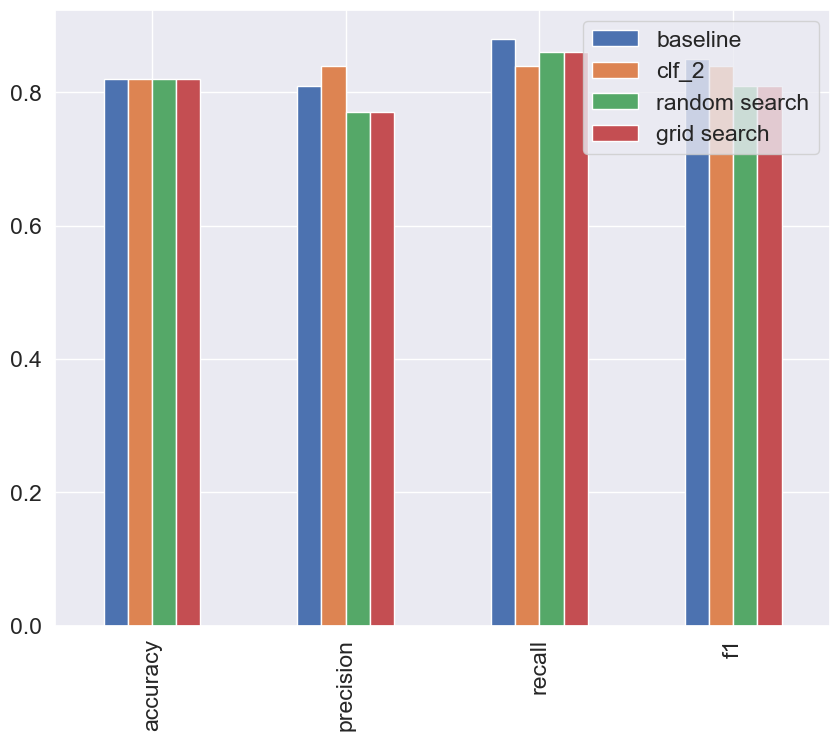

In [165]:
plt.close('all')
compare_metrics = pd.DataFrame({"baseline":baseline_metrics , 
                                 "clf_2":clf_2_metrics ,
                                 "random search":rs_metrics,
                                 "grid search":gs_metrics})
compare_metrics.plot.bar(figsize = (10,8));
plt.show()

## 6. Saving and loading trained machine learning models
Two ways to save and load models :

1.with python's  `pickle` module

2.with the `joblib` module

In [167]:
import pickle
# SAve an existing model to file
pickle.dump(gs_clf , open("gs_random_forest_model_1.pkl" , "wb"))

C:\Users\SinhaWiz\AppData\Local\Temp\ipykernel_11732\3824773627.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_forest_model_1.pkl'>
  pickle.dump(gs_clf , open("gs_random_forest_model_1.pkl" , "wb"))


In [168]:
#Load a saved model 
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))

C:\Users\SinhaWiz\AppData\Local\Temp\ipykernel_11732\3713665598.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_forest_model_1.pkl'>
  loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl","rb"))


In [169]:
loaded_pickle_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [170]:
#make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds( y_test, pickle_y_preds)

Accuracy :81.97%
Precision:77.42%
Recall   :85.71%
F1 score :81.36%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Save & load using `joblib` module** 

In [171]:
from joblib import dump,load
#save model to file
dump(gs_clf ,filename = "gs_model_joblib_save.joblib")

['gs_model_joblib_save.joblib']

In [172]:
loaded_job_model = load(filename ="gs_model_joblib_save.joblib" )

In [173]:
loaded_job_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [174]:
joblib_y_preds = loaded_job_model.predict(x_test)
evaluate_preds( y_test,joblib_y_preds)

Accuracy :81.97%
Precision:77.42%
Recall   :85.71%
F1 score :81.36%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together

https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html

In [177]:
data = pd .read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [178]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [179]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

**Steps we wanna do (all in 1 cell)**

    1.Fill missing data
    2.Convert data to numbers
    3.Build model on the data

In [191]:
# Getting data ready

import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# Setup Random Seed

import numpy as np 
np.random.seed(42)

# Import data and drop rows with missing labels

data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"] , inplace = True)

# Define different features and transformer pipeline

categorical_features = ["Make" , "Colour"]
categorical_transformer = Pipeline(steps = [("imputer" , SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_features = ["Doors"]
door_transformer = Pipeline(steps = [("imputer" , SimpleImputer(strategy="constant",fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [("imputer" , SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values , then convert to numbers)

preprocessor = ColumnTransformer(transformers=[("cat",categorical_transformer,categorical_features),
                                              ("door",door_transformer,door_features),
                                              ("num",numeric_transformer , numeric_features)])

#Create a preprocessing and modelling pipeline

model = Pipeline(steps = [("preprocessor",preprocessor),
                          ("model",RandomForestRegressor())])

#Split Data

x = data.drop("Price",axis = 1)
y = data["Price"]
x_train , x_test , y_train , y_test = train_test_split( x , y ,test_size = 0.2)
# Fit & Score the model
model.fit(x_train,y_train)
model.score(x_test , y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomSearchCV` with our `Pipeline`

In [196]:
# Use GridSearchCV with out regression  Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["sqrt", "log2", None],
    "model__min_samples_split":[2,4]
}
gs_model = GridSearchCV(model , pipe_grid ,cv =5 ,verbose =2)
gs_model.fit(x_train , y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [197]:
gs_model.score(x_test , y_test)

0.28660438125948107